In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 


import warnings
warnings.filterwarnings('ignore')

DATA LOADING AND EXPLORATION

In [54]:
data = pd.read_csv("mobile_prices_2023.csv")

In [55]:
data.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


DATA CLEANING AND PREPARATION

In [57]:
data.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [58]:
data_cleaned = data.copy()
data_cleaned.dropna(thresh=len(data.columns)*0.7, inplace=True) 

In [59]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1826 non-null   object 
 1   Rating ?/5         1826 non-null   float64
 2   Number of Ratings  1826 non-null   object 
 3   RAM                1826 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1826 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1826 non-null   object 
 10  Date of Scraping   1826 non-null   object 
dtypes: float64(1), object(10)
memory usage: 171.2+ KB


In [60]:
data_cleaned.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          164
Back/Rare Camera       0
Front Camera         391
Battery                0
Processor             45
Price in INR           0
Date of Scraping       0
dtype: int64

In [61]:
# Removing , and $ from the values
data_cleaned['Number of Ratings'] = data_cleaned['Number of Ratings'].astype(str).str.replace(',', '').astype(float)
data_cleaned['Price in INR'] = data_cleaned['Price in INR'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Text Parsing - Extract numeric values from 'RAM', 'ROM/Storage', 'Battery'
data_cleaned['RAM'] = data_cleaned['RAM'].str.extract('(\d+)').astype(float)
data_cleaned['ROM/Storage'] = data_cleaned['ROM/Storage'].str.extract('(\d+)').astype(float)
data_cleaned['Battery'] = data_cleaned['Battery'].str.extract('(\d+)').astype(float)

Replacing null values with mode

In [79]:
mode_value = data_cleaned['ROM/Storage'].mode()[0]
data_cleaned['ROM/Storage'].fillna(mode_value, inplace=True)

mode_value = data_cleaned['Front Camera'].mode()[0]
data_cleaned['Front Camera'].fillna(mode_value, inplace=True)

mode_value = data_cleaned['Processor'].mode()[0]
data_cleaned['Processor'].fillna(mode_value, inplace=True)


In [63]:
# Date format changing
data_cleaned['Date of Scraping'] = pd.to_datetime(data_cleaned['Date of Scraping'])

In [64]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Phone Name         1826 non-null   object        
 1   Rating ?/5         1826 non-null   float64       
 2   Number of Ratings  1826 non-null   float64       
 3   RAM                1826 non-null   float64       
 4   ROM/Storage        1826 non-null   float64       
 5   Back/Rare Camera   1826 non-null   object        
 6   Front Camera       1826 non-null   object        
 7   Battery            1826 non-null   float64       
 8   Processor          1826 non-null   object        
 9   Price in INR       1826 non-null   float64       
 10  Date of Scraping   1826 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 171.2+ KB


In [65]:
data_cleaned.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561.0,2.0,32.0,8MP Dual Camera,5MP Front Camera,5000.0,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649.0,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128.0,4.0,64.0,50MP + 2MP,8MP Front Camera,5000.0,Mediatek Dimensity 700 Processor,11999.0,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175.0,4.0,64.0,8MP Dual Rear Camera,5MP Front Camera,5000.0,Helio G36 Processor,6999.0,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621.0,4.0,64.0,50MP Dual Rear Camera,5MP Front Camera,5000.0,Mediatek Helio G85 Processor,7749.0,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,15175.0,4.0,64.0,8MP Dual Rear Camera,5MP Front Camera,5000.0,Helio G36 Processor,6999.0,2023-06-17


EXPLORATORY DATA ANALYSIS

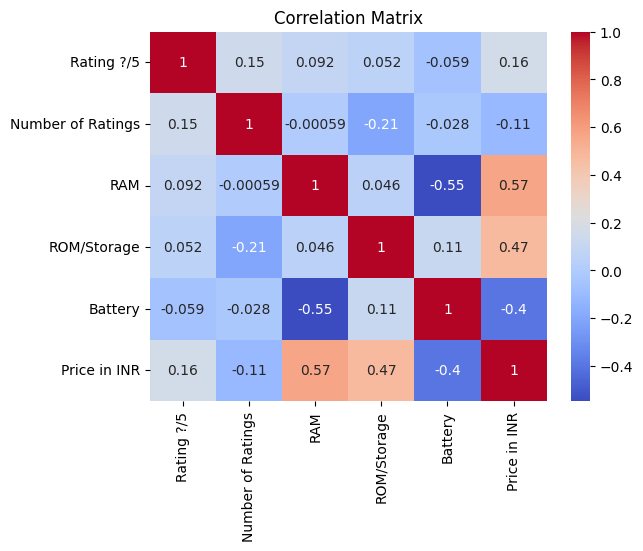

In [66]:
# a. Heatmap: Correlation Matrix
numeric_cols = data_cleaned.select_dtypes(include=[float, int]).columns
correlation_matrix = data_cleaned[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



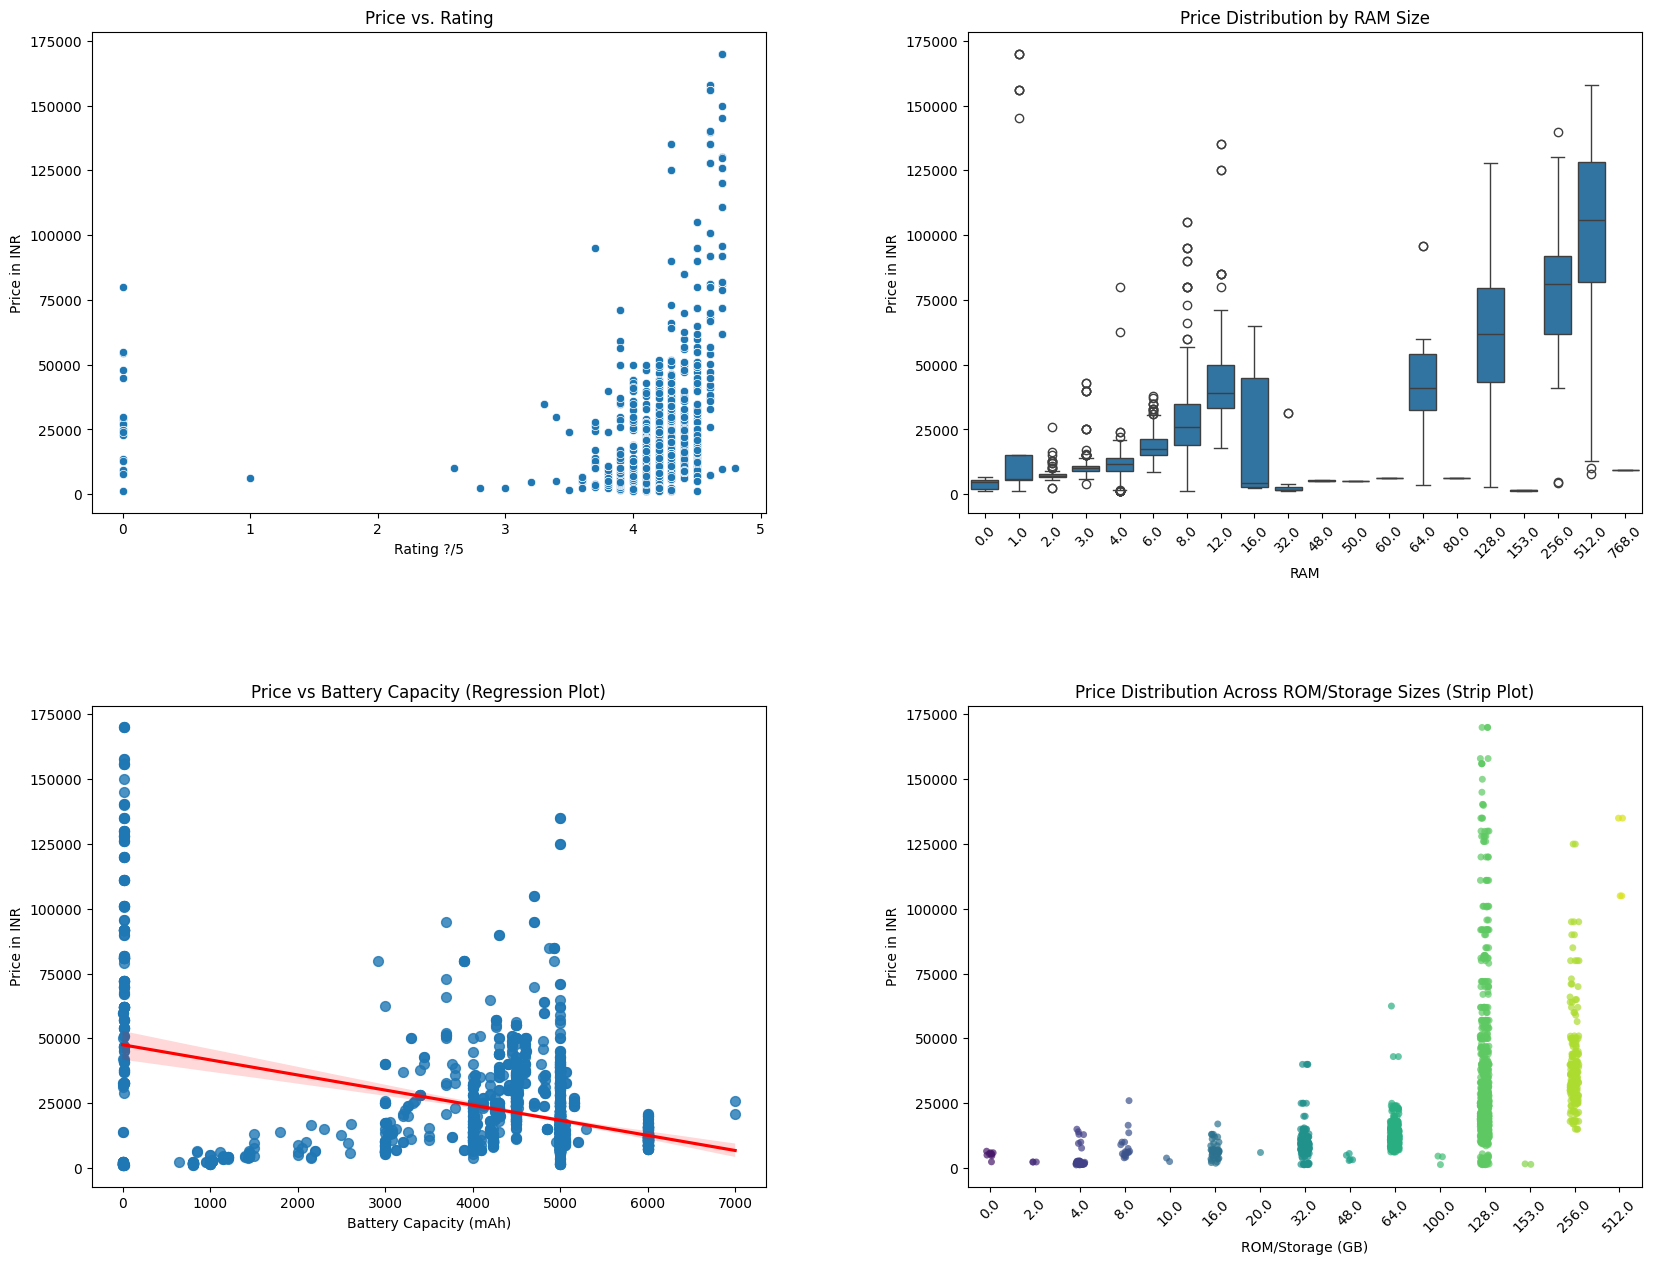

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Adjust the spacing between the plots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Scatter Plot: Price vs. Rating
sns.scatterplot(x='Rating ?/5', y='Price in INR', data=data_cleaned, ax=axs[0, 0])
axs[0, 0].set_title('Price vs. Rating')

# Box Plot: Price distribution across different RAM sizes
sns.boxplot(x='RAM', y='Price in INR', data=data_cleaned, order=sorted(data_cleaned['RAM'].unique()), ax=axs[0, 1])
axs[0, 1].set_title('Price Distribution by RAM Size')
axs[0, 1].tick_params(axis='x', rotation=45)

# Regression Plot: Price distribution vs Battery capacity
sns.regplot(x='Battery', y='Price in INR', data=data_cleaned, scatter_kws={'s':50}, line_kws={'color':'red'}, ax=axs[1, 0])
axs[1, 0].set_title('Price vs Battery Capacity (Regression Plot)')
axs[1, 0].set_xlabel('Battery Capacity (mAh)')
axs[1, 0].set_ylabel('Price in INR')

# Strip Plot: Price distribution vs ROM size
sns.stripplot(x='ROM/Storage', y='Price in INR', data=data_cleaned, jitter=True, palette='viridis', alpha=0.7, ax=axs[1, 1])
axs[1, 1].set_title('Price Distribution Across ROM/Storage Sizes (Strip Plot)')
axs[1, 1].set_xlabel('ROM/Storage (GB)')
axs[1, 1].set_ylabel('Price in INR')
axs[1, 1].tick_params(axis='x', rotation=45)

# Show the main figure
plt.show()

In [68]:
# Function to detect and remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return DataFrame without outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Iterate over each numeric column to remove outliers
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    df = remove_outliers(data_cleaned, col)

DATA ANALYSIS

In [69]:
data_cleaned.describe()

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Battery,Price in INR,Date of Scraping
count,1826.000000,1.826000e+03,1826.000000,1826.000000,1826.000000,1826.000000,1826
mean,4.219058,4.693457e+04,25.012048,107.489595,4072.690581,23832.502738,2023-06-17 00:00:00
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1199.000000,2023-06-17 00:00:00
25%,4.200000,1.353000e+03,4.000000,64.000000,4000.000000,10115.000000,2023-06-17 00:00:00
50%,4.300000,8.579000e+03,6.000000,128.000000,5000.000000,15999.000000,2023-06-17 00:00:00
75%,4.400000,4.149500e+04,8.000000,128.000000,5000.000000,27997.250000,2023-06-17 00:00:00
max,4.800000,1.342530e+06,768.000000,512.000000,7000.000000,169999.000000,2023-06-17 00:00:00
std,0.516233,9.777745e+04,79.184334,68.274877,1683.124981,24399.981785,NaN


In [70]:
features = ['RAM', 'Battery', 'Rating ?/5','ROM/Storage']  
target = 'Price in INR'

In [71]:
X = data_cleaned[features] # Adjust features as needed
y = data_cleaned[target]

In [72]:
#Encoding categorical columns into numerical using one hot encoding
X = pd.get_dummies(X)

In [73]:
#splitting the dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
#Satndardizing the features using standard scaler method
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
#using regressor models as values are continous not discrete
models = {
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "XGBoost": XGBRegressor()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Evaluate the model
    results[name] = {
        "R² Score": r2_score(y_test, predictions),
        "MAE": mean_absolute_error(y_test, predictions),
        "MSE": mean_squared_error(y_test, predictions)
    }
    if name == "LinearRegression":
        coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
        intercept = model.intercept_
        predicted_prices = model.predict(X)
        
        print(f"{name} Model Coefficients:")
        print(coefficients)
        print(f"Intercept: {intercept}")
        print(f"Predicted Prices: {predicted_prices[:5]}")  


LinearRegression Model Coefficients:
              Coefficient
RAM           9891.210084
Battery      -5600.783410
Rating ?/5    2323.418242
ROM/Storage  11965.616793
Intercept: 23873.919863013696
Predicted Prices: [-27567602.61473175 -27164920.45718995 -27164688.11536575
 -27164920.45718995 -27164688.11536575]


In [76]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                       R² Score           MAE           MSE
DecisionTreeRegressor  0.893435   3803.757340  6.547836e+07
RandomForest           0.901077   4024.475580  6.078297e+07
LinearRegression       0.486400  10539.385427  3.155795e+08
XGBoost                0.906809   3801.054650  5.726077e+07


VISUALIZATION OF RESULT

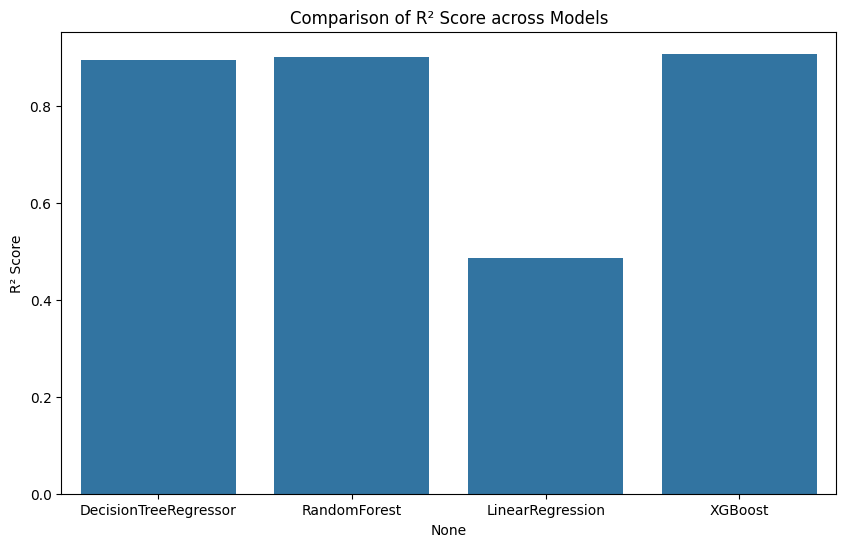

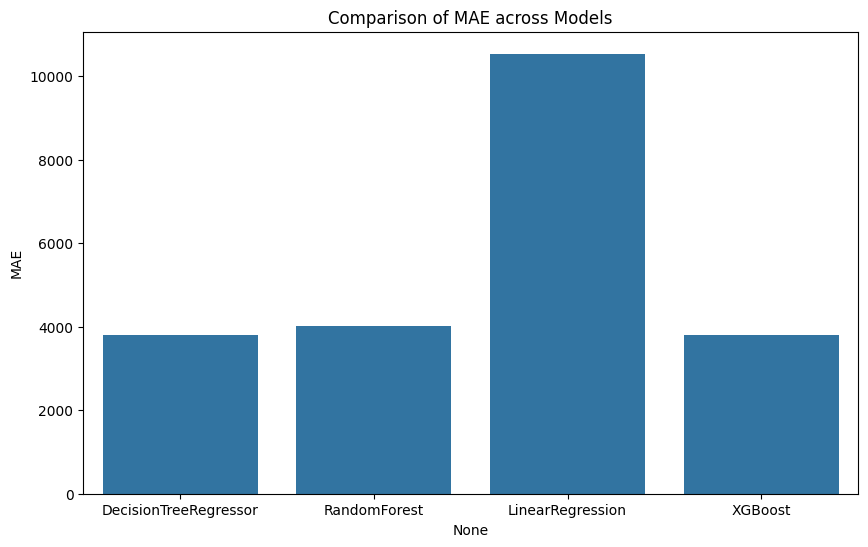

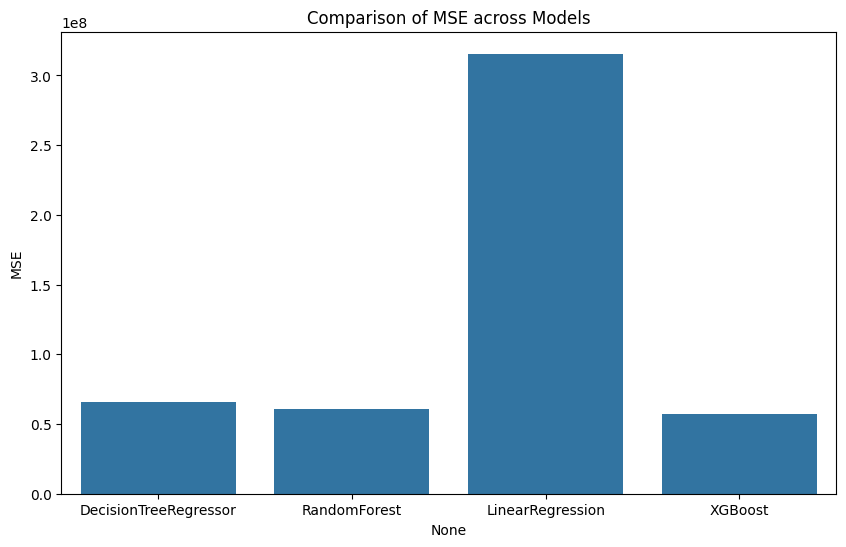

In [77]:
# Visualize model performance
metrics = ["R² Score", "MAE", "MSE"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f'Comparison of {metric} across Models')
    plt.ylabel(metric)
    plt.show()




RECOMMENDATION

R2 value - Ranges from -1 to +1 <br>
    1. +1 Best Fit<br>
    2. 0 No Fit<br>
    3. -1 Worst Fit <br>
<br>

MAE value - Mean Absolute Error<br>
    Lower MAE - Model's prediction are closer to actual values.<br>
    Higher MAE - Model's prediction deviate more from the actual values.<br>
<br>

MSE value - Mean Squared Error<br>
    Lower MSE - Model's prediction are closer to actual values.<br>
    Higher MSE - Model's prediction deviate more from the actual values.<br>

In [78]:
# Based on the results, recommend the best-performing model.
best_model1 = results_df['R² Score'].idxmax()
print(f"The best performing model is {best_model1} with an R² Score of {results_df.loc[best_model1, 'R² Score']:.2f}.")

best_model2 = results_df['MAE'].idxmin()
print(f"The best performing model is {best_model2} with MAE Score of {results_df.loc[best_model2, 'MAE']:.2f}.")

best_model3 = results_df['MSE'].idxmin()
print(f"The best performing model is {best_model3} with MSE Score of {results_df.loc[best_model3, 'MSE']:.2f}.")


The best performing model is XGBoost with an R² Score of 0.91.
The best performing model is XGBoost with MAE Score of 3801.05.
The best performing model is XGBoost with MSE Score of 57260765.20.
